# Reto: Predicción del Costo del Seguro Médico

En este ejercicio, utilizarás un modelo de **regresión lineal** para predecir el costo del seguro médico de diferentes individuos basado en sus características personales. El conjunto de datos que usarás se encuentra disponible en Kaggle y ya está limpio, lo que te permitirá enfocarte en el análisis y el desarrollo del modelo.

---

## Descripción del conjunto de datos

El conjunto de datos incluye las siguientes columnas:

- **age**: Edad del individuo (en años).
- **sex**: Género del individuo (`male` o `female`).
- **bmi**: Índice de Masa Corporal (IMC).
- **children**: Número de hijos cubiertos por el seguro.
- **smoker**: Si el individuo es fumador (`yes` o `no`).
- **region**: Región donde vive el individuo (`northeast`, `northwest`, `southeast`, `southwest`).
- **charges**: Costo del seguro médico (variable objetivo a predecir).

---

## Objetivo

Entrenar un modelo de regresión lineal que prediga el costo del seguro médico (**`charges`**) utilizando las características proporcionadas en el conjunto de datos.

---

## Tareas

### 1. Cargar y explorar el conjunto de datos
1. Descarga el conjunto de datos desde [este enlace](https://www.kaggle.com/datasets/mirichoi0218/insurance) y cárgalo en un marco de datos Pandas.
2. Inspecciona las primeras filas del conjunto de datos.
3. Verifica que no haya valores faltantes ni inconsistencias.

### 2. Dividir los datos
1. Separa las columnas en:
   - **Variables predictoras** (`age`, `sex`, `bmi`, `children`, `smoker`, `region`).
   - **Variable objetivo** (`charges`).
2. Realiza una codificación adecuada de las variables categóricas (`sex`, `smoker`, `region`) utilizando técnicas como `pd.get_dummies()` o `OneHotEncoder`.
3. Divide los datos en conjuntos de entrenamiento (80%) y prueba (20%) utilizando `train_test_split` de Scikit-learn.

### 3. Entrenar el modelo
1. Importa la clase `LinearRegression` de Scikit-learn.
2. Ajusta el modelo a los datos de entrenamiento.
3. Imprime el intercepto y los coeficientes del modelo.

### 4. Evaluar el modelo
1. Calcula la puntuación R² en el conjunto de entrenamiento y prueba.
2. Genera una lista de las características más influyentes basándote en los coeficientes del modelo.

### 5. Interpretar los resultados
1. Discute qué variables parecen tener un mayor impacto en el costo del seguro.
2. ¿Qué tan bien se desempeña el modelo en general?


¡Buena suerte! 🚀


In [117]:
# Import your libraries:
import statsmodels.api as sm
import numpy as np
import pandas as pd

# Cargar el archivo CSV desde la carpeta Downloads
insurance = pd.read_csv(r'C:\Users\smont\Documents\first_repo\ironhackDA\data\insurance.csv')

x = insurance
# Análisis de calidad de la base de datos
print("TOTAL NUMBER OF ROWS: ",len(x),"\n")
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -\n")
print("NUMBER OF UNIQUE VALUES:",x.nunique(),"\n")
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - \n")
print("NUMBER OF UNIQUE VALUES DIVIDED BY TOTAL VALUES:",round((x.nunique()/len(x)*100),2),"%\n")
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - \n")
print("% OF NAN VALUES IS: ",round(100*(x.isnull().sum() / len(x)),2),"%\n")
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - \n")

TOTAL NUMBER OF ROWS:  1338 

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

NUMBER OF UNIQUE VALUES: age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64 

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

NUMBER OF UNIQUE VALUES DIVIDED BY TOTAL VALUES: age          3.51
sex          0.15
bmi         40.96
children     0.45
smoker       0.15
region       0.30
charges     99.93
dtype: float64 %

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

% OF NAN VALUES IS:  age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64 %

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 



In [118]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [119]:
# Your code here: 5 values

# Crear la tabla de frecuencias para la columna 'cylinders'
cylinder_counts = insurance['region'].value_counts()

# Mostrar la tabla de frecuencias
print("Tabla de frecuencias para la columna 'region':")
print(cylinder_counts)

# Contar el número de valores únicos en la columna 'cylinders'
num_unique_cylinders = insurance['region'].nunique()

# Mostrar la cantidad de valores únicos
print(f'\nNúmero de valores posibles de region: {num_unique_cylinders}')

Tabla de frecuencias para la columna 'region':
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

Número de valores posibles de region: 4


In [120]:
# Your code here: all of them are numbers
print(insurance.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [121]:
from sklearn.preprocessing import LabelEncoder

# Inicializar el codificador
encoder = LabelEncoder()

# Transformar la columna
insurance['sex'] = encoder.fit_transform(insurance['sex'])
insurance['smoker'] = encoder.fit_transform(insurance['smoker'])
#insurance['region'] = encoder.fit_transform(insurance['region'])

insurance['children'] = insurance['children'].apply(lambda x: 0 if 0 <= x <= 1 else (1 if 2 <= x <= 5 else None))

# Crear la columna 'norte_sur': 1 si es norte, 0 si es sur
insurance['norte_sur'] = insurance['region'].apply(lambda x: 1 if 'north' in x else 0)

# Crear la columna 'este_oeste': 1 si es este, 0 si es oeste
insurance['este_oeste'] = insurance['region'].apply(lambda x: 1 if 'east' in x else 0)
insurance = insurance.drop(columns=['region'])


insurance.head()

,age,sex,bmi,children,smoker,charges,norte_sur,este_oeste
0,19,0,27.900,0,2,16884.92400,0,0
1,18,1,33.770,0,0,1725.55230,0,1
2,28,1,33.000,1,0,4449.46200,0,1
3,33,1,22.705,0,0,21984.47061,1,0
4,32,1,28.880,0,0,3866.85520,1,0


In [134]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
insurance[['sex','age', 'bmi', 'charges']] = scaler.fit_transform(insurance[['sex','age', 'bmi', 'charges']])

In [148]:
#insurance = insurance.apply(pd.to_numeric, errors='coerce')
print(insurance.dtypes)

age           float64
sex           float64
bmi           float64
children        int64
smoker          int32
charges       float64
norte_sur       int64
este_oeste      int64
dtype: object


In [149]:
insurance.head()

,age,sex,bmi,children,smoker,charges,norte_sur,este_oeste
0,-1.438764,-1.010519,0.458088,0,2,0.298584,0,0
1,-1.509965,0.989591,0.504316,0,0,-0.953689,0,1
2,-0.797954,0.989591,0.379317,1,0,-0.728675,0,1
3,-0.441948,0.989591,-1.291942,0,0,0.719843,1,0
4,-0.513149,0.989591,-0.289511,0,0,-0.776802,1,0


In [150]:
# Obtener la edad más antiguo y más reciente
oldest_ = insurance['age'].min()
youngest_ = insurance['age'].max()

# Imprimir los resultados
print(f'Edad más senior es: {oldest_}')
print(f'Edad más joven es: {youngest_}')

Edad más senior es: -1.5099654504939402
Edad más joven es: 1.7652893000611622


In [151]:
# Your code here: 5 values

# Crear la tabla de frecuencias para la columna 'cylinders'
cylinder_counts = insurance['children'].value_counts()

# Mostrar la tabla de frecuencias
print("Tabla de frecuencias para la columna 'children':")
print(cylinder_counts)

# Contar el número de valores únicos en la columna 'cylinders'
num_unique_cylinders = insurance['children'].nunique()

# Mostrar la cantidad de valores únicos
print(f'\nNúmero de valores posibles de hijos: {num_unique_cylinders}')

Tabla de frecuencias para la columna 'children':
children
0    898
1    440
Name: count, dtype: int64

Número de valores posibles de hijos: 2


In [152]:
# Your code here: 5 values

# Crear la tabla de frecuencias para la columna 'cylinders'
cylinder_counts = insurance['age'].value_counts()

# Mostrar la tabla de frecuencias
print("Tabla de frecuencias para la columna 'age':")
print(cylinder_counts)

# Contar el número de valores únicos en la columna 'cylinders'
num_unique_cylinders = insurance['age'].nunique()

# Mostrar la cantidad de valores únicos
print(f'\nNúmero de valores posibles de años: {num_unique_cylinders}')

Tabla de frecuencias para la columna 'age':
age
-1.509965    69
-1.438764    68
 0.768473    29
 0.839674    29
 0.554869    29
 0.483668    29
 0.412467    29
-1.367563    29
 0.626070    29
 0.910875    29
-1.225161    28
 0.697271    28
 1.053277    28
 0.982076    28
-1.296362    28
-0.940356    28
-1.082758    28
-1.011557    28
-0.797954    28
-0.869155    28
-1.153959    28
 0.270064    27
-0.726752    27
-0.655551    27
 0.127662    27
 0.198863    27
 0.341265    27
-0.584350    27
 0.056461    27
-0.513149    26
-0.441948    26
 1.195680    26
-0.370746    26
 1.124479    26
 1.266881    26
-0.157143    25
 1.409283    25
 1.338082    25
-0.228344    25
-0.085942    25
-0.299545    25
-0.014740    25
 1.551686    23
 1.480485    23
 1.694088    23
 1.622887    23
 1.765289    22
Name: count, dtype: int64

Número de valores posibles de años: 47


In [153]:
from sklearn.model_selection import train_test_split

# 1. Eliminar la columna 'car_name'
#insurance = insurance.drop(columns=['children'])
#insurance = insurance.drop(columns=['sex'])
#insurance = insurance.drop(columns=['region'])


# 2. Separar las variables predictoras (X) y la variable de respuesta (y)
X = insurance.drop(columns=['charges'])  # Variables predictoras
y = insurance['charges']  # Variable de respuesta (mpg)

# 3. Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las formas de los conjuntos de datos
print("Tamaño del conjunto de entrenamiento (X_train, y_train):", X_train.shape, y_train.shape)
print("Tamaño del conjunto de prueba (X_test, y_test):", X_test.shape, y_test.shape)

Tamaño del conjunto de entrenamiento (X_train, y_train): (1070, 7) (1070,)
Tamaño del conjunto de prueba (X_test, y_test): (268, 7) (268,)


In [154]:
# Importar la clase LinearRegression --> ya lo teníamos de antes! 
from sklearn.linear_model import LinearRegression

# Inicializar el modelo de regresión lineal
modelo_regresion = LinearRegression()

# Verificar que el modelo ha sido inicializado correctamente
print(modelo_regresion)

LinearRegression()


In [155]:
# Ajustar el modelo con los datos de entrenamiento
modelo_regresion.fit(X_train, y_train)

LinearRegression()

In [156]:
# Ajustar el modelo a los datos de entrenamiento
modelo_regresion.fit(X_train, y_train)

# Realizar las predicciones sobre el conjunto de prueba
y_pred = modelo_regresion.predict(X_test)

# Calcular la puntuación R^2
r2_score = modelo_regresion.score(X_test, y_test)

# Imprimir la puntuación R^2
print(f'Puntuación R^2 del modelo: {r2_score}')


Puntuación R^2 del modelo: 0.7576914461088673


In [157]:
# Generar las predicciones para los datos de entrenamiento
y_train_pred = modelo_regresion.predict(X_train)

# Calcular la puntuación R² para los datos de entrenamiento
r2_train = modelo_regresion.score(X_train, y_train)

# Imprimir la puntuación R² en los datos de entrenamiento
print(f'Puntuación R² en los datos de entrenamiento: {r2_train}')

Puntuación R² en los datos de entrenamiento: 0.7158441294964807


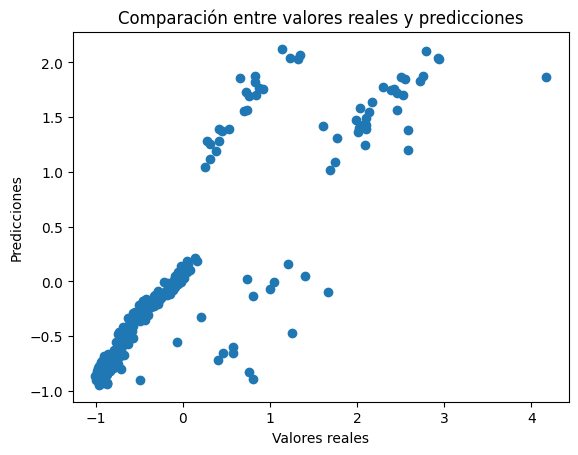

In [158]:
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Comparación entre valores reales y predicciones")
plt.show()

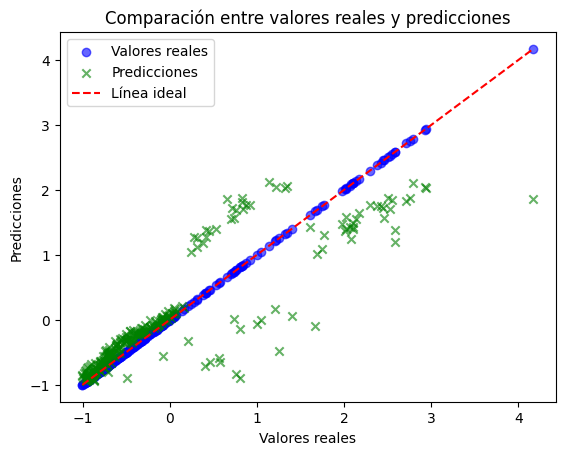

In [159]:
import matplotlib.pyplot as plt
import numpy as np

# Graficar valores reales vs predicciones
plt.scatter(y_test, y_test, color='blue', alpha=0.6, label="Valores reales", marker='o')  # Puntos para valores reales
plt.scatter(y_test, y_pred, color='green', alpha=0.6, label="Predicciones", marker='x')  # Puntos para predicciones
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Línea ideal")  # Línea diagonal

# Etiquetas y título
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Comparación entre valores reales y predicciones")
plt.legend()  # Añadir leyenda
plt.show()

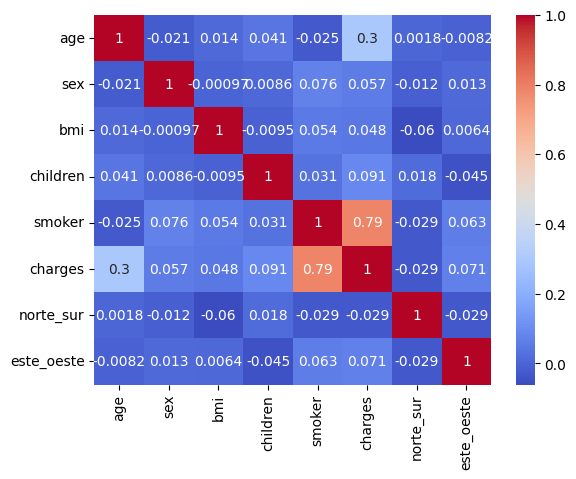

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(insurance.corr(), annot=True, cmap='coolwarm')
plt.show()